In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU

In [6]:
url = "https://raw.githubusercontent.com/baren-kumar/ML-/refs/heads/main/nottem_temperature_data.csv"
df =pd.read_csv(url, parse_dates=['Date'], index_col='Date')
df.head()



,Temperature_F
Date,
1920-01-31,40.6
1920-02-29,40.6
1920-03-31,43.0
1920-04-30,51.2
1920-05-31,55.6


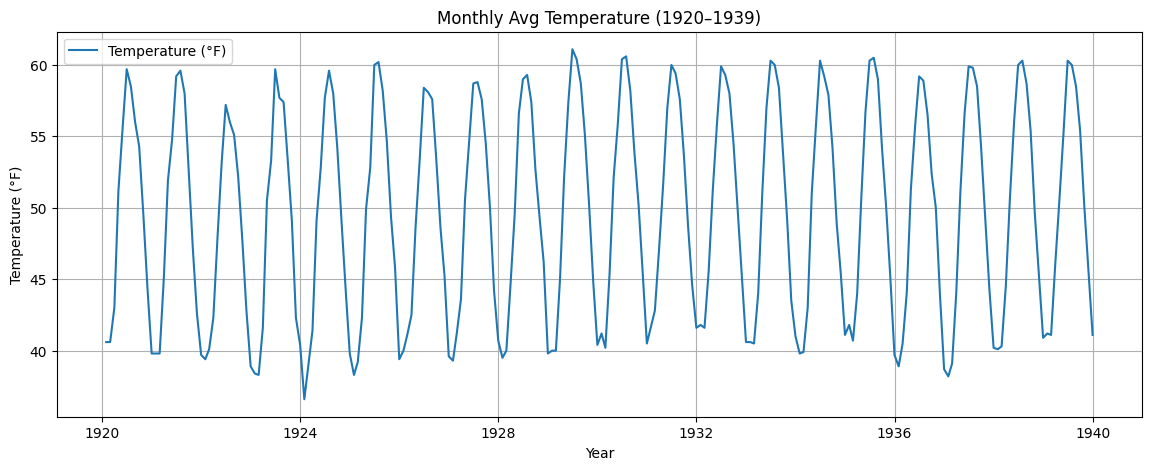

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(df, label='Temperature (°F)')
plt.title('Monthly Avg Temperature (1920–1939)')
plt.xlabel('Year')
plt.ylabel('Temperature (°F)')
plt.grid(True)
plt.legend()
plt.show()

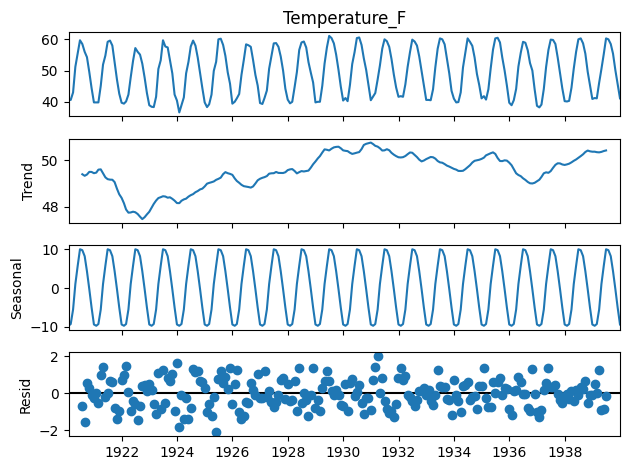

In [8]:
# Decompose Seasonality and Trend
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Temperature_F'], model='additive', period=12)
result.plot()
plt.show()

In [9]:
#  Check for Stationarity
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Temperature_F'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -1.8067030353929014
p-value: 0.37713893744426935


In [12]:
 # Create lag features
df['lag1'] = df['Temperature_F'].shift(1)
df['lag2'] = df['Temperature_F'].shift(2)
df = df.dropna()

# Features and target
X = df[['lag1', 'lag2']]
y = df['Temperature_F']

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# Train Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

print(f"Train Score: {model.score(X_train, y_train):.3f}")
print(f"Test Score: {model.score(X_test, y_test):.3f}")

Train Score: 0.927
Test Score: 0.962


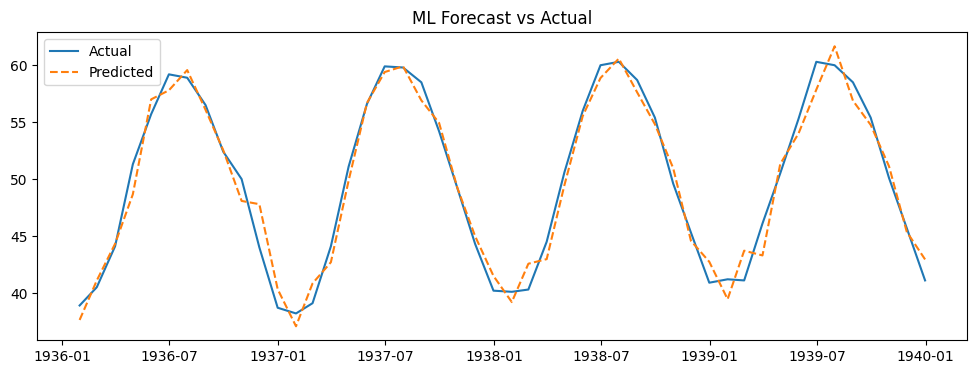

In [13]:
y_pred = model.predict(X_test)

plt.figure(figsize=(12, 4))
plt.plot(y_test.index, y_test.values, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted', linestyle='--')
plt.title('ML Forecast vs Actual')
plt.legend()
plt.show()